# [Advent of Code 2015](http://adventofcode.com/2015)

In 2015 I did the first 8 or so problems of Advent of Code in Go and then got busy and went no further.

While waiting for 2017, let's do a few in Python to warm up!

Here, I use the [ipnyb](https://github.com/ipython/ipynb) module to import that Notebook as if it were a normal Python module.

In [1]:
from ipynb.fs.full.aoc_helpers import *

In [2]:
import re
import numpy as np
import math
import itertools as it

from collections import Counter, defaultdict, namedtuple, deque
from functools   import lru_cache, partial
from itertools   import permutations, combinations, chain, cycle, product, islice
from heapq       import heappop, heappush

import matplotlib.pyplot as plt
%matplotlib inline

As the Helpers module is shared between 2015, 2016 and 2017, I'm partially applying the `Input` function to specify the year.

`Input(day, year) -> partial(Input, year=2017) -> Input(3) == Input(3, 2017)`

This allows me to use `Input(3)` in the 2016 file to get day 3 of 2016, as well as `Input(3)` in the 2017 file to get day 3 of 2017.

In [3]:
Input = partial(Input, year=2015)

## [Day 1](http://adventofcode.com/2015/day/1): Not Quite Lisp

For this problem we're simply counting open parens `(` and closing parens `)`.

A `(` goes up a floor, `)` goes down a floor.  
Given a string of `(`s and `)`s what floor do you end up on?

In [4]:
def walk(parens):
    return sum(1 if p == '(' else -1 for p in parens)

In [5]:
assert walk('(())') == walk('()()') == 0
assert walk('(((') == walk('(()(()(') == 3
assert walk('))(((((') == 3
assert walk('())') == walk('))(') == -1
assert walk(')))') == walk(')())())') == -3

In [6]:
parens = Input(1).read()

In [7]:
walk(parens)

232

For Part 2 we must find the position of the first character that puts us in the basement (-1)

We can create a generator that yields the position every time we hit floor -1

In [8]:
def basement(parens):
    floor = 0
    for i, p in enumerate(parens, 1):
        floor += 1 if p == '(' else -1
        if floor == -1:
            yield i

In [9]:
next(basement(parens))

1783

## [Day 2](http://adventofcode.com/2015/day/2): I Was Told There Would Be No Math

We want to calculate the wrapping paper needed to wrap presents given the width, height, and length of the presents.

A present with dimensions 2x3x4 requires `2*6 + 2*12 + 2*8 = 52` square feet of wrapping paper plus 6 square feet of slack, for a total of 58 square feet.

In [10]:
def area(w, h, l):
    return 2*l*w + 2*w*h + 2*h*l

def paper_needed(w, h, l):
    slack = min(l*w, w*h, h*l)
    return area(w, h, l) + slack

In [11]:
assert area(2,3,4) == 52
assert paper_needed(2,3,4) == 58

In [12]:
presents = [parse_ints(present) for present in Input(2)]
presents[0:3]

[[29, 13, 26], [11, 11, 14], [27, 2, 5]]

In [13]:
sum(paper_needed(*present) for present in presents)

1586300

For part B we're asked to compute the length of ribbon the elves must purchase as well.

Ribbon is the perimeter of the smallest face plus the cubic volume of the present.

A present with dimensions 2x3x4 requires 2+2+3+3 = 10 feet of ribbon to wrap the present plus `2*3*4 = 24` feet of ribbon for the bow, for a total of 34 feet.

In [14]:
def ribbon_needed(w, h ,l):
    s1, s2 = sorted([w, h, l])[0:2]
    return s1 + s1 + s2 + s2 + w * h * l

In [15]:
assert ribbon_needed(2,3,4) == 34

In [16]:
sum(ribbon_needed(*present) for present in presents)

3737498

## [Day 3](http://adventofcode.com/2015/day/3): Perfectly Spherical Houses in a Vacuum
We've got an infinite grid for Santa to deliver presents to.
He delivers to his starting cell at 0,0 at the start of the program and then recieves a direction v<^> that indicates the direction he should travel to deliver another present.

How many houses recieve at least one present?

We can use a `set` to represent visited points as we are simply ensuring there's been a delivery, not the count of delivieries.

In [17]:
def deliver(directions):
    d = {'v': Point(0,-1), '<': Point(-1,0), '^': Point(0,1), '>': Point(1,0)}
    
    location = Point(0,0)
    delivered = set([location])
    for direction in directions:
        location += d[direction]
        delivered.add(location)
    return delivered

In [18]:
deliver('^>v<')

{Point(x=0, y=0), Point(x=0, y=1), Point(x=1, y=0), Point(x=1, y=1)}

In [19]:
assert len(deliver('>')) == 2
assert len(deliver('^>v<')) == 4
assert len(deliver('^v^v^v^v^v')) == 2

In [20]:
santa_dirs = Input(3).read()

In [21]:
len(deliver(santa_dirs))

2565

For part B we have a robotic santa who also departs from 0,0.
The instructions are now split in alternating order between Santa and Robo Santa.

How many houses get at least 1 present?

We can easily split the even/odd elements of the instructions into two separate arrays using the `step` portion of an array slice operator `[start:end:step]`

In [22]:
santa_houses = santa_dirs[::2]
robo_santa_houses = santa_dirs[1::2]

We can use the `|` operator to get all elements in either `santa_houses` or `robo_santa_houses`.

In [23]:
len(deliver(santa_houses) | deliver(robo_santa_houses))

2639

## [Day 4](http://adventofcode.com/2015/day/4): The Ideal Stocking Stuffer

We're looking for md5(our key + a number) == '00000....'

In [24]:
def is_adventcoin(ins, zeros=5):
    return md5(ins).startswith('0' * zeros)

In [25]:
assert md5('abcdef609043').startswith('00000')
assert is_adventcoin('abcdef609043')

`itertools.count` is an infinite generator of numbers so we can filter its results to only adventcoins.

In [26]:
key = 'ckczppom'

In [27]:
first(i for i in it.count(1) if is_adventcoin(f'{key}{i}'))

117946

For part B we're looking for 6 zeros at the start of the hash instead of 5.

In [28]:
first(i for i in it.count(1) if is_adventcoin(f'{key}{i}', zeros=6))

3938038

## [Day 5](http://adventofcode.com/2015/day/5): Doesn't He Have Intern-Elves For This?

We would like to differentiate between **nice** and **naughty** strings.

Nice Strings have the following properties:
- It contains at least three vowels (aeiou only), like aei, xazegov, or aeiouaeiouaeiou.
- It contains at least one letter that appears twice in a row, like xx, abcdde (dd), or aabbccdd (aa, bb, cc, or dd).
- It does not contain the strings ab, cd, pq, or xy, even if they are part of one of the other requirements.

How many of the input strings are **nice**?

In [29]:
def is_nice(text):
    three_vowels = len(re.findall(r'[aeiou]', text)) >= 3
    duplicates = re.search(r'(\w)\1', text)
    stopwords = re.search(r'ab|cd|pq|xy', text)
    return three_vowels and duplicates and not stopwords

In [30]:
assert is_nice('ugknbfddgicrmopn')
assert is_nice('aaa')
assert not is_nice('jchzalrnumimnmhp') # no double letter
assert not is_nice('haegwjzuvuyypxyu') # contains xy
assert not is_nice('dvszwmarrgswjxmb') # only 1 vowel

In [31]:
len([word for word in Input(5) if is_nice(word)])

258

Part B abandons the ridiculous rules of Part A for clearly superior, sensible rules for niceness.

Nice strings now have the following properites:
- It contains a pair of any two letters that appears at least twice in the string without overlapping, like xyxy (xy) or aabcdefgaa (aa), but not like aaa (aa, but it overlaps).
- It contains at least one letter which repeats with exactly one letter between them, like xyx, abcdefeghi (efe), or even aaa.

In [32]:
def is_nice_improved(text):
    pair = re.findall(r'(\w{2}).*\1', text)
    repeat = re.findall(r'(\w)\w\1', text)
    return pair and repeat

In [33]:
len([word for word in Input(5) if is_nice_improved(word)])

53

## [Day 6](http://adventofcode.com/2015/day/6): Probably a Fire Hazard

We have christmas lights in a 1000x1000 grid. The bounds are: 0,0, 0,999, 999,999, and 999,0
Given a list of instructions of **turn on**, **turn off**, or **toggle** ranges of lights, inclusive.

Input examples are as follows:
- turn on 0,0 through 999,999 would turn on (or leave on) every light.
- toggle 0,0 through 999,0 would toggle the first line of 1000 lights, turning off the ones that were on, and turning on the ones that were off.
- turn off 499,499 through 500,500 would turn off (or leave off) the middle four lights.

In [34]:
ins = list(Input(6))
ins[0:5:2]

['toggle 461,550 through 564,900\n',
 'turn off 464,858 through 833,915\n',
 'turn on 599,989 through 806,993\n']

In [35]:
def parse6(line):
    command, x1, y1, x2, y2 = re.match(r'(toggle|turn off|turn on) (\d+),(\d+) through (\d+),(\d+)', line).groups()
    return (command, Point(int(x1), int(y1)), Point(int(x2), int(y2)))

list(map(parse6, ins[0:5:2]))

[('toggle', Point(x=461, y=550), Point(x=564, y=900)),
 ('turn off', Point(x=464, y=858), Point(x=833, y=915)),
 ('turn on', Point(x=599, y=989), Point(x=806, y=993))]

Numpy has great support for the creation and manipulation of n dimensional arrays.
We can easily set and invert slices to implement the various commands

In [36]:
lights = np.zeros((1000,1000), dtype=np.bool)

def toggle(start, end):
    lights[start.x:end.x+1, start.y:end.y+1] = ~lights[start.x:end.x+1, start.y:end.y+1]

def turn_on(start, end):
    lights[start.x:end.x+1, start.y:end.y+1] = True
    
def turn_off(start, end):
    lights[start.x:end.x+1, start.y:end.y+1] = False

In [37]:
def run_command(com):
    command, start, end = com
    if   command == 'toggle':   toggle(start, end)
    elif command == 'turn on':  turn_on(start, end)
    elif command == 'turn off': turn_off(start, end)    

In [38]:
for command in map(parse6, Input(6)):
    run_command(command)

np.sum(lights)

543903

For Part B we find that the lights actually have brightness controls.
- The phrase turn on actually means that you should increase the brightness of those lights by 1.
- The phrase turn off actually means that you should decrease the brightness of those lights by 1, to a minimum of zero.
- The phrase toggle actually means that you should increase the brightness of those lights by 2.

Whats the total brightness?

In [39]:
lights = np.zeros((1000,1000), dtype=np.int)

def toggle(start, end):
    lights[start.x:end.x+1, start.y:end.y+1] += 2
    
def turn_on(start, end):
    lights[start.x:end.x+1, start.y:end.y+1] += 1
    
def turn_off(start, end):
    on = lights[start.x:end.x+1, start.y:end.y+1]
    on[on > 0] -= 1

In [40]:
for command in map(parse6, Input(6)):
    run_command(command)

np.sum(lights)

14687245

## [Day 7](http://adventofcode.com/2015/day/7): Some Assembly Required

This one looks more interesting! We're building a circuit via instructions of wires and boolean logic gates.

- `123 -> x` means that the signal 123 is provided to wire x.
- `x AND y -> z` means that the bitwise AND of wire x and wire y is provided to wire z.
- `p LSHIFT 2 -> q` means that the value from wire p is left-shifted by 2 and then provided to wire q.
- `NOT e -> f` means that the bitwise complement of the value from wire e is provided to wire f.
- Additional commands are `RSHIFT` and `OR`


### Input
```
123 -> x
456 -> y
x AND y -> d
x OR y -> e
x LSHIFT 2 -> f
y RSHIFT 2 -> g
NOT x -> h
NOT y -> i
```

### Output
```
d: 72
e: 507
f: 492
g: 114
h: 65412
i: 65079
x: 123
y: 456
```

The gates all perform bitwise operations on the input.  
The only issue Python has representing this data is the lack of an unsigned integer type for the boolean not `~`.

In [41]:
def parse7(line):
    line = line.replace('-> ', '').strip().split(' ')
    if len(line) == 2:
        return tuple([line[0], 'EQ', line[1]])
    if len(line) == 3:
        return tuple([line[1], line[0], line[2]])
    return tuple(line)

def value(wire):
    if isinstance(wire, int):
        return wire
    elif wire.isdigit():
        return int(wire)
    else:
        return signals.get(wire)

def eq_c(i, o):        signals[o] = value(i)
def and_c(i1, i2, o):  signals[o] = value(i1) & value(i2)
def or_c(i1, i2, o):   signals[o] = value(i1) | value(i2)
def not_c(i, o):       signals[o] = ~value(i) & 0xffff
def rshift_c(i, n, o): signals[o] = value(i) >> value(n)
def lshift_c(i, n, o): signals[o] = value(i) << value(n)
    
def can_run_command(wires):
    return all(value(wire) != None for wire in wires[:-1])

def run_command(com):
    inp, command, *args = com
    if   command == 'EQ': eq_c(inp, *args)
    elif command == 'AND': and_c(inp, *args)
    elif command == 'NOT': not_c(inp, *args) 
    elif command == 'OR': or_c(inp, *args) 
    elif command == 'RSHIFT':  rshift_c(inp, *args)
    elif command == 'LSHIFT': lshift_c(inp, *args)
        
def run_gates(gates=None):
    if not gates:
        gates = deque(parse7(line) for line in Input(7)) 
    while gates:
        gate = gates.popleft()
        i, com, *r = gate
        if can_run_command([i, *r]):
            run_command(gate)
        else: 
            gates.append(gate)

In [42]:
signals = {}
gates = deque([('123', 'EQ', 'x'), ('456', 'EQ', 'y'), ('x', 'AND', 'y', 'd'),
               ('x', 'OR', 'y', 'e'), ('x', 'NOT', 'h'), ('x', 'LSHIFT', 2, 'f'),
               ('y', 'RSHIFT', 2, 'g'), ('y', 'NOT', 'i')])
run_gates(gates)
signals

{'d': 72,
 'e': 507,
 'f': 492,
 'g': 114,
 'h': 65412,
 'i': 65079,
 'x': 123,
 'y': 456}

In [43]:
signals = {}
run_gates()
signals['a']

956

Part B asks us to assign wire b to the value of signal a, clear all other signals, and run the program again.

In [44]:
def value(wire):
    if wire == 'b': return 956
    if isinstance(wire, int):
        return wire
    elif wire.isdigit():
        return int(wire)
    else:
        return signals.get(wire)

In [45]:
signals = {}
run_gates()
signals['a']

40149

As a whole, I'm not super happy with this solution and may come back to improve it later.

## [Day 8](http://adventofcode.com/2015/day/8): Matchsticks 

We're looking at the in memory representation versus the string length.
- "" is an empty string but is two characters due to the quotes.
- "abc" is 5 characters of code, 3 characters long
- "aaa\"aaa" is 10 characters of code long, 6 a and one escaped " long.
- "\x27" is 6 characters of code long, but is only one character (an escaped ')

What is the number of characters of code for string literals minus the number of characters in memory for the values of the strings in total for the entire file?

In [46]:
def memlen(text):
    return len(eval(text))

In [47]:
assert len(r'""') == 2
assert memlen(r'""') == 0

assert len(r'"\x27"') == 6
assert memlen(r'"\x27"') == 1

In [48]:
sum(len(line.strip()) - memlen(line.strip()) for line in Input(8))

1333

For part B we're asked to encode the input string.

- "" encodes to "\"\"", an increase from 2 characters to 6.
- "abc" encodes to "\"abc\"", an increase from 5 characters to 9.
- "aaa\"aaa" encodes to "\"aaa\\\"aaa\"", an increase from 10 characters to 16.
- "\x27" encodes to "\"\\x27\"", an increase from 6 characters to 11.

Your task is to find the total number of characters to represent the newly encoded strings minus the number of characters of code in each original string literal.

For example, for the strings above, the total encoded length (6 + 9 + 16 + 11 = 42) minus the characters in the original code representation (23, just like in the first part of this puzzle) is 42 - 23 = 19.

In [49]:
def encodedlen(text):
    return len(re.escape(text)) + 2 # We lack the surrounding quotes, so add the length

In [50]:
assert encodedlen(r'"aaa\"aaa"') == 16
assert encodedlen(r'"\x27"') == 11

In [51]:
sum(encodedlen(line.strip()) - len(line.strip()) for line in Input(8))

2046

## [Day 9](http://adventofcode.com/2015/day/9): All in a Single Night

For day 9 we're given a list of locations as well as the distance between them and asked to find the shortest path that visits each point at least once.

Time for a weighted non-directed graph!

In [52]:
def parse9(line):
    match = re.match(r'(\w+) to (\w+) = (\d+)', line).groups()
    return (match[0], match[1], int(match[2]))

In [53]:
graph = defaultdict(dict)
for line in Input(9):
    start, end, distance = parse9(line)
    graph[start][end] = distance
    graph[end][start] = distance

I'm going to go as simple as I can for part A and we'll see if we need to go more complicated for B. Let's just try all permutations of locations!

In [54]:
perms = list(it.permutations(graph.keys()))

def walk(locations):
    return sum(graph[start][end] for [start, end] in subsequences(locations, 2))
    
min(walk(perm) for perm in perms)

251

Hey, good thing I went simple. Part B just wants the longest distance.

In [55]:
max(walk(perm) for perm in perms)

898

## [Day 10](http://adventofcode.com/2015/day/10): Elves Look, Elves Say

This is a game where you look at the numbers and say their counts out loud.
`211` is read as "one two, two ones", which converted back into numbers becomes `1221`.

In [56]:
def looksay(num, times=1):
    num = str(num)
    for _ in range(times):
        num = ''.join([f'{sum(1 for n in g)}{n}' for n, g in it.groupby(num)])
    return num

In [57]:
assert looksay(1) == '11'
assert looksay(11) == '21'
assert looksay(21) == '1211'
assert looksay(1211) == '111221'
assert looksay(111221) == '312211'
assert looksay(1, 2) == '21'

We need to do 40 iterations and it's increasing in time by a WHOOOLE lot.

In [58]:
%time len(looksay(1113222113, 30))

Wall time: 42 ms


17874

In [59]:
%time len(looksay(1113222113, 35))

Wall time: 131 ms


67070

In [60]:
%time len(looksay(1113222113, 40))

Wall time: 512 ms


252594

We're just on the edge of whats computationally practical on this laptop.
Our number of digits is increasing exponentially at this point. For part B, we're doing 50 iterations.

In [61]:
%time len(looksay(1113222113, 50))

Wall time: 6.91 s


3579328

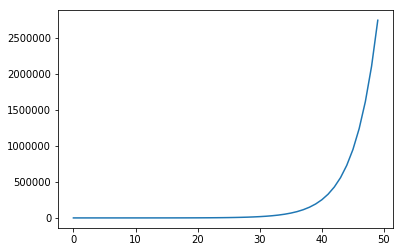

In [62]:
plt.plot([len(looksay(1113222113, i)) for i in range(0,50)])

## [Day 11](http://adventofcode.com/2015/day/11): Corporate Policy

Santa has a password policy of incrementing his old password until it produces a valid result.

Incrementing works much like letters; `xx`, `xy`, `xz`, `ya`, `yb`

### Valid Password Requirements

- Passwords must include **one increasing straight of at least three letters**, like `abc`, `bcd`, `cde`, and so on, up to `xyz`. They cannot skip letters; `abd` doesn't count.
- Passwords may **not contain the letters `i`, `o`, or `l`**, as these letters can be mistaken for other characters and are therefore confusing.
- Passwords must contain at least **two different, non-overlapping pairs of letters**, like `aa`, `bb`, or `zz`.

Getting the index of an item in a list throws a ValueError if it does not exist.  
There isn't a safe method like `get` for indexes, so we make one instead.

In [63]:
def get_index(list_, item):
    try:
        return list_.index(item)
    except ValueError:
        return None

The three rules are fairly easy to encode into their own functions.

In [64]:
def has_two_groups(pw):
    matches = re.findall(r'(\w)\1', pw)
    return len(set(matches)) >= 2
    
def has_three_in_a_row(pw):
    return any(ord(a) == ord(b)-1 == ord(c)-2
               for (a, b, c) in subsequences(pw, 3))

def has_invalid_chars(pw):
    return 'i' in pw or 'o' in pw or 'l' in pw

def is_valid_pw(pw):
    return has_three_in_a_row(pw) and not has_invalid_chars(pw) and has_two_groups(pw)

In [65]:
assert not is_valid_pw('hijklmmn')
assert not is_valid_pw('abbceffg')
assert not is_valid_pw('abbcegjk')
assert is_valid_pw('hepxxyzz')

The most complicated aspect of generating the next password revolves around the invalid characters `i` `o` and `l`.

Given a password `abcidefgh` $\rightarrow$ `abcjaaaaa`  
Find the lowest index containing `i` `o` or `l`, increment it to the next letter, and reset the subsequent characters to `a`

In [66]:
def replace_invalid_chars(pw):
    if not has_invalid_chars(pw): return False
    i, o, l = get_index(pw, 'i'), get_index(pw, 'o'), get_index(pw, 'l')
    index = min(char for char in [i, o, l] if char)
    return pw[:index] + list(increment_letter(pw[index])) + list('a' * len(pw[index+1:]))

def increment_letter(letter):
    if letter == 'z': return False
    else: return chr(ord(letter) + 1)

In [67]:
assert cat(replace_invalid_chars(list('abcinmjk'))) == 'abcjaaaa'

In [68]:
def generate_pw(pw):
    pw = list(pw)
    while True:
        if has_invalid_chars(pw):
            pw = replace_invalid_chars(pw)
            yield ''.join(pw)
        for i, l in reversed(list(enumerate(pw))):
            new_letter = increment_letter(l)
            if new_letter: 
                pw[i] = new_letter
                break
            else:
                pw[i] = 'a'
        yield ''.join(pw)
        
def generate_valid_pws(initial):
    for pw in generate_pw(initial):
        if is_valid_pw(pw):
            yield pw

In [69]:
assert first(generate_valid_pws('abcdefgh')) == 'abcdffaa'
assert first(generate_valid_pws('ghijklmn')) == 'ghjaabcc'

Part A wants the first new valid password.

In [70]:
first(generate_valid_pws('hepxcrrq'))

'hepxxyzz'

Part B wants the second valid password.

In [71]:
nth(generate_valid_pws('hepxcrrq'), 1)

'heqaabcc'

## [Day 12](http://adventofcode.com/2015/day/12): JSAbacusFramework.io

Part A doesnt need any actual json parsing, lets just use a regex to grab all the numbers and sum them.

In [72]:
sum(parse_ints(first(Input(12))))

191164

Part B is where it gets interesting.

Ignore any object (and all of its children) which has any property with the value "red". Do this only for objects ({...}), not arrays ([...]).

We'll load the file as json and recursively walk its items.
- **Array**: we walk each item of the array.  
- **Dictionary**: first we check to see if any of the values of the dictionary are 'red'.
  - If so, we skip the dictionary and its keys entirely.
  - If it doesn't, we walk each value of the dictionary.
- **Integer**: Add the integer to the sum.
- **Everything Else**: Ignored.

Start at the root node and voila, we have our sum!

In [73]:
import json
j = json.load(Input(12))

In [74]:
def walk_json(j):
    if isinstance(j, int): return j
    elif isinstance(j, list):
        return sum(walk_json(item) for item in j)
    elif isinstance(j, dict):
        if 'red' in j.values(): return 0
        return sum(walk_json(item) for item in j.values())
    return 0

walk_json(j)

87842